In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [51]:
# importing csv file
df = pd.read_csv('netflix_titles.csv')

In [52]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data Cleaning

### Is there any  duplicate rows in the dataset ?

In [55]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


#### No duplicate rows

### Is there any null value in the dataset?

In [56]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

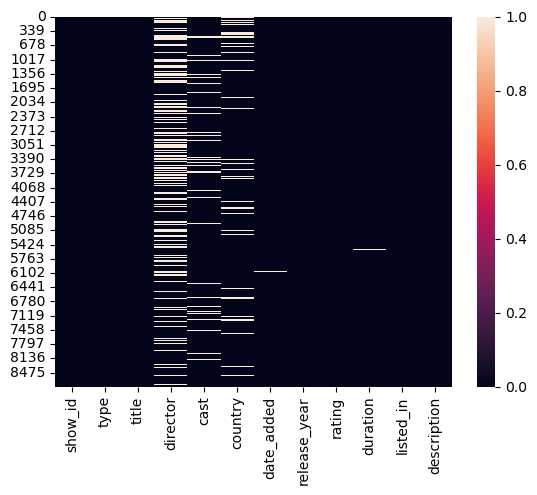

In [57]:
sns.heatmap(df.isnull())

###  Q1. In which year show 'Sacred Games' was released and who was the director of the show ?

In [58]:
df[df['title'].isin(['Sacred Games'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3589,s3590,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...


In [59]:
# str.contains() method to do the same question

df[df['title'].str.contains('Sacred Games')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3589,s3590,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...


In [60]:
df[df['title'].str.contains('Sacred Games')][['release_year','director']]

,release_year,director
3589,2019,"Vikramaditya Motwane, Anurag Kashyap"


### Q2. How COVID-19 pandemic affected film and TV industry ? Was there any downfall in the production activity in 2020 and 2021 ?  Illustrate with a Bar Graph.

In [63]:
# Create a new column 'adding_date' with data type datetime from 'date_added'

df['adding_date']= pd.to_datetime(df['date_added'])

In [64]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,adding_date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


In [65]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
adding_date     datetime64[ns]
dtype: object

In [68]:
# Count of movies each year

df['adding_date'].dt.year.value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: adding_date, dtype: int64

<Axes: >

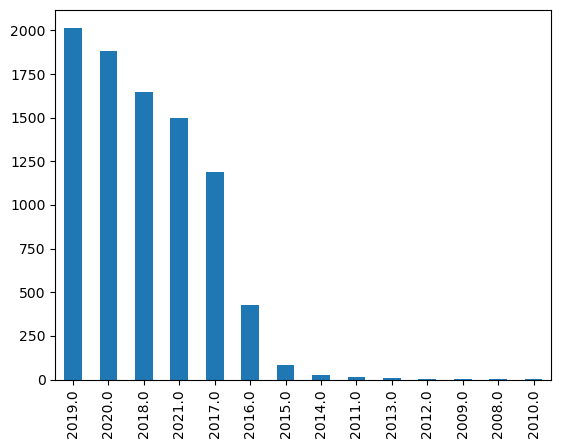

In [74]:
df['adding_date'].dt.year.value_counts().plot(kind = 'bar')

*We can observe the the maximum number of movies and TV shows were added in 2019 and there was a downward trend in 2020 and 2021*

### Q3. How many movies and TV shows are there in the dataset ? Show with a Bar Graph.

In [75]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,adding_date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24


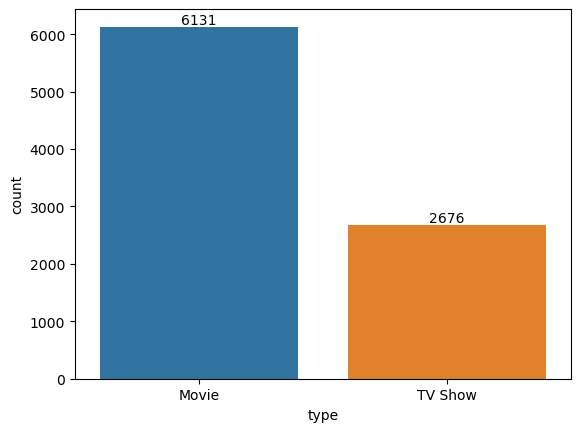

In [91]:
 ax= sns.countplot(x = 'type', data = df)
 
for bars in ax.containers:
    ax.bar_label(bars)   

### Q4. How many movies were released in the year 2020 ?

In [110]:
df[(df['type'] == 'Movie') & (df['release_year'] == 2020)].shape

(517, 13)

### Q5. How  title of all the TV shows that were released in India only ?

In [114]:
df[(df['type'] == 'TV Show') & (df['country'] == 'India')][['title']]

,title
4,Kota Factory
39,Chhota Bheem
50,Dharmakshetra
66,Raja Rasoi Aur Anya Kahaniyan
69,Stories by Rabindranath Tagore
...,...
8173,Thackeray
8235,The Calling
8321,The Golden Years with Javed Akhtar
8349,The House That Made Me


### Q6. Show top 10 Directors who has the maximum number of TV Shows and Movies on Netflix .

In [144]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,adding_date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24


In [119]:
df['director'].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

### Q7. How many comedy movies of Jim Carrey are listed on Netflix ?

In [121]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,adding_date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24


In [130]:
df[(df['type'] == 'Movie') & (df['cast'].str.contains('Jim Carrey')) & (df['listed_in'].str.contains('Comedies')) ]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,adding_date
931,s932,Movie,Fun with Dick & Jane,Dean Parisot,"Jim Carrey, Téa Leoni, Alec Baldwin, Richard J...",United States,"May 1, 2021",2005,PG-13,91 min,Comedies,"After losing their high-paying corporate jobs,...",2021-05-01
1144,s1145,Movie,Yes Man,Peyton Reed,"Jim Carrey, Zooey Deschanel, Bradley Cooper, J...","United States, United Kingdom","April 1, 2021",2008,PG-13,104 min,"Comedies, Romantic Movies","After a bitter divorce, a loan officer falls u...",2021-04-01
7013,s7014,Movie,How the Grinch Stole Christmas,Ron Howard,"Jim Carrey, Taylor Momsen, Jeffrey Tambor, Chr...",United States,"June 1, 2017",2000,PG,105 min,"Children & Family Movies, Comedies",The Grinch decides to rob Whoville of Christma...,2017-06-01


### Q8. What are different ratings in the Netflix ?

In [135]:
df_new = df.dropna()

In [137]:
df_new['rating'].nunique()

14

In [140]:
df_new['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

### Q9. How many PG-13 movies has been  released on Netflix in India since 2018 ?

In [151]:
df[(df['type'] == 'Movie') & (df['rating'] == 'PG-13') & (df['release_year'] >= 2018) & (df['country'].str.contains('India'))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,adding_date
1228,s1229,Movie,Bombay Rose,Gitanjali Rao,"Cyli Khare, Gargi Shitole, Amardeep Jha, Amit ...","India, United Kingdom, France, Qatar","March 8, 2021",2021,PG-13,97 min,"Dramas, Independent Movies, International Movies",Amidst the bustle of a magnetic and multifacet...,2021-03-08
4693,s4694,Movie,Pad Man,R. Balki,"Akshay Kumar, Sonam Kapoor, Radhika Apte, Jyot...",India,"August 21, 2018",2018,PG-13,130 min,"Dramas, International Movies, Romantic Movies","Despite public humiliation and resistance, an ...",2018-08-21


### Q10. What is the longest duration Movie on the Netflix ? 

In [154]:
# first we need to split the numerical value and  minutes in 'duration' into two separate columns 

df[['minutes','unit']] = df['duration'].str.split(' ', expand = True)

In [155]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,adding_date,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,1,Season


In [159]:
# We need to change the dtype from object to float

df['minutes'] = df['minutes'].astype(float)

In [161]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
adding_date     datetime64[ns]
minutes                float64
unit                    object
dtype: object

In [168]:
df[df['type'] == 'Movie']['minutes'].max()

312.0

In [175]:
df[df[df['type'] == 'Movie']['minutes'].max() == df['minutes']]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,adding_date,minutes,unit
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018-12-28,312.0,min


### Q11. Which country has maximum number of TV shows on Netflix ?

In [176]:
df_tvs = df[df['type'] == 'TV Show']

In [180]:
df_tvs['country'].value_counts().head(1) 

United States    760
Name: country, dtype: int64